# Clustering Crypto

In [1]:
# Initial imports
import requests
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [2]:
# Use the following endpoint to fetch json data
requests_url = "https://min-api.cryptocompare.com/data/all/coinlist"

response_data = requests.get(requests_url).json()

In [3]:
response_data

{'Response': 'Success',
 'Message': 'Coin list succesfully returned!',
 'Data': {'42': {'Id': '4321',
   'Url': '/coins/42/overview',
   'ImageUrl': '/media/35650717/42.jpg',
   'ContentCreatedOn': 1427211129,
   'Name': '42',
   'Symbol': '42',
   'CoinName': '42 Coin',
   'FullName': '42 Coin (42)',
   'Description': 'Everything about 42 coin is 42 - apart from the transaction fees and difficulty retargetting - 0.00000001 and 7.5mins. A scrypt coin with 42 coins max, a 42 second block time, with superblocks giving 10 times the standard block reward of 0.0000420 42&#39;s.42 coin is a cryptocurrency with completed emission, fair distribution (no ICO, premine or instamine) and both private and public transaction support. The maximum supply of 42 coins makes the remaining 41.99 extremely rare. The innovative deflationary model provides a constant rise in incentives both for miners and long term investors. 42-coin delivers a hybrid of Proof-of-Work and Proof-of-Stake transaction confirmat

In [4]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.
tokens = []
data = []

for i in response_data['Data']:
    tokens.append(i)
    data.append(response_data['Data'][i])

json_normalized = pd.json_normalize(data)
json_normalized.head()

Id                  Url                         ImageUrl  \
0    4321   /coins/42/overview           /media/35650717/42.jpg   
1  749869  /coins/300/overview          /media/27010595/300.png   
2   33639  /coins/365/overview            /media/352070/365.png   
3   21227  /coins/404/overview  /media/35650851/404-300x300.jpg   
4  926547  /coins/433/overview          /media/34836095/433.png   

   ContentCreatedOn Name Symbol   CoinName         FullName  \
0        1427211129   42     42    42 Coin     42 Coin (42)   
1        1517935016  300    300  300 token  300 token (300)   
2        1480032918  365    365    365Coin    365Coin (365)   
3        1466100361  404    404    404Coin    404Coin (404)   
4        1541597321  433    433  433 Token  433 Token (433)   

                                         Description AssetTokenStatus  ...  \
0  Everything about 42 coin is 42 - apart from th...              N/A  ...   
1  300 token is an ERC20 token. This Token was cr...              N/A  ...   
2  365Coin is a Proof of Work and Proof of Stake ...              N/A  ...   
3  404 is a PoW/PoS hybrid cryptocurrency that al...              N/A  ...   
4  433 Token is a decentralised soccer platform t...         Finished  ...   

  Taxonomy.CollateralInfo Rating.Weiss.Rating  \
0                                               
1                                               
2                                               
3                                               
4                                               

  Rating.Weiss.TechnologyAdoptionRating  Rating.Weiss.MarketPerformanceRating  \
0                                                                               
1                                                                               
2                                                                               
3                                                                               
4                                                                               

   PlatformType  BuiltOn                        SmartContractAddress  \
0           NaN      NaN                                         NaN   
1         token      ETH  0xaec98a708810414878c3bcdf46aad31ded4a4557   
2           NaN      NaN                                         NaN   
3           NaN      NaN                                         NaN   
4           NaN      NaN                                         NaN   

  DecimalPoints  Difficulty  IsUsedInDefi  
0           NaN         NaN           NaN  
1          18.0         NaN           NaN  
2           NaN         NaN           NaN  
3           NaN         NaN           NaN  
4           NaN         NaN           NaN  

[5 rows x 40 columns]

In [5]:
# Alternatively, use the provided csv file:
file_path = Path("../AWS_cloud_homework_uw_fintech/Resources/crypto_data.csv")

# Create a DataFrame
crypto_df_alt = pd.read_csv(file_path)
crypto_df_alt.head()

Unnamed: 0   CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
0         42    42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
1        365    365Coin       X11       True   PoW/PoS              NaN   
2        404    404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
3        611  SixEleven   SHA-256       True       PoW              NaN   
4        808        808   SHA-256       True   PoW/PoS     0.000000e+00   

  TotalCoinSupply  
0              42  
1      2300000000  
2       532000000  
3          611000  
4               0

In [6]:
#Check Data Types
json_normalized.dtypes

Id                                        object
Url                                       object
ImageUrl                                  object
ContentCreatedOn                           int64
Name                                      object
Symbol                                    object
CoinName                                  object
FullName                                  object
Description                               object
AssetTokenStatus                          object
Algorithm                                 object
ProofType                                 object
SortOrder                                 object
Sponsored                                   bool
IsTrading                                   bool
TotalCoinsMined                          float64
BlockNumber                              float64
NetHashesPerSecond                        object
BlockReward                              float64
BlockTime                                float64
AssetLaunchDate     

In [7]:
#crypto_df = json_normalized[['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined', 'MaxSupply']]
#crypto_df = crypto_df.rename(columns = {'MaxSupply': 'TotalCoinSupply'})
#crypto_df.head()

In [8]:
#Convert Column 'TotalCoinSupply' to float64
crypto_df = crypto_df_alt
crypto_df['TotalCoinSupply'] = pd.to_numeric(crypto_df['TotalCoinSupply'], errors='coerce')
crypto_df.head()

Unnamed: 0   CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
0         42    42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
1        365    365Coin       X11       True   PoW/PoS              NaN   
2        404    404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
3        611  SixEleven   SHA-256       True       PoW              NaN   
4        808        808   SHA-256       True   PoW/PoS     0.000000e+00   

   TotalCoinSupply  
0     4.200000e+01  
1     2.300000e+09  
2     5.320000e+08  
3     6.110000e+05  
4     0.000000e+00

### Data Preprocessing

In [9]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df = crypto_df.drop(columns = ['Unnamed: 0'])
crypto_df.shape

(1252, 6)

In [10]:
# Keep only cryptocurrencies that are trading
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.shape

(1144, 6)

In [11]:
pd.unique(crypto_df['Algorithm'])

array(['Scrypt', 'X11', 'SHA-256', 'X13', 'Ethash', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'NIST5', 'Quark',
       'Groestl', 'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256',
       'Scrypt-n', 'PHI1612', 'Lyra2REv2', 'CryptoNight', 'Shabal256',
       'Counterparty', 'Blake', 'Momentum', 'Stanford Folding', 'QuBit',
       'XG Hash', 'M7 POW', 'Curve25519', 'Lyra2RE', 'QUAIT', 'vDPOS',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'Dagger',
       'CryptoNight-Lite', 'X11GOST', 'SHA-256D', 'POS 3.0',
       'Progressive-n', 'DPoS', 'Lyra2Z', 'X14', 'Time Travel', 'Argon2',
       'Keccak', 'Blake2S', 'Dagger-Hashimoto', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'SkunkHash',
       'C11', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'YescryptR16', 'IMesh',
       'Green Protocol', 'Semux BFT consensus', 'X16R', 'Tribus',


In [12]:
# Keep only cryptocurrencies with a working algorithm
crypto_df = crypto_df[crypto_df.Algorithm.notnull()]
crypto_df.shape

(1144, 6)

In [13]:
# Remove the "IsTrading" column
crypto_df = crypto_df.drop(columns = ['IsTrading'])
crypto_df.head()

CoinName Algorithm ProofType  TotalCoinsMined  TotalCoinSupply
0    42 Coin    Scrypt   PoW/PoS     4.199995e+01     4.200000e+01
1    365Coin       X11   PoW/PoS              NaN     2.300000e+09
2    404Coin    Scrypt   PoW/PoS     1.055185e+09     5.320000e+08
3  SixEleven   SHA-256       PoW              NaN     6.110000e+05
4        808   SHA-256   PoW/PoS     0.000000e+00     0.000000e+00

In [14]:
# Remove rows with at least 1 null value
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

crypto_df = crypto_df.dropna()
crypto_df.head()

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 3 null values


CoinName Algorithm ProofType  TotalCoinsMined  TotalCoinSupply
0    42 Coin    Scrypt   PoW/PoS     4.199995e+01     4.200000e+01
2    404Coin    Scrypt   PoW/PoS     1.055185e+09     5.320000e+08
4        808   SHA-256   PoW/PoS     0.000000e+00     0.000000e+00
5  EliteCoin       X13   PoW/PoS     2.927942e+10     3.141593e+11
7    Bitcoin   SHA-256       PoW     1.792718e+07     2.100000e+07

In [15]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df =crypto_df.query('TotalCoinsMined > 0')
crypto_df.head()

CoinName Algorithm ProofType  TotalCoinsMined  TotalCoinSupply
0    42 Coin    Scrypt   PoW/PoS     4.199995e+01     4.200000e+01
2    404Coin    Scrypt   PoW/PoS     1.055185e+09     5.320000e+08
5  EliteCoin       X13   PoW/PoS     2.927942e+10     3.141593e+11
7    Bitcoin   SHA-256       PoW     1.792718e+07     2.100000e+07
8   Ethereum    Ethash       PoW     1.076842e+08     0.000000e+00

In [16]:
pd.unique(crypto_df['CoinName'])
pd.unique(crypto_df['ProofType'])

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'LPoS', 'PoS/LPoS'], dtype=object)

In [17]:
# Drop rows where there are 'N/A' text values
for column in crypto_df.columns:
    if crypto_df[column].dtype == 'object':
        print(f"Column {column} has {crypto_df[column].str.contains('N/A').sum()} N/A values")

crypto_df = crypto_df[~crypto_df.CoinName.str.contains('N/A')]
crypto_df = crypto_df[~crypto_df.Algorithm.str.contains('N/A')]
crypto_df = crypto_df[~crypto_df.ProofType.str.contains('N/A')]
crypto_df.shape

Column CoinName has 0 N/A values
Column Algorithm has 0 N/A values
Column ProofType has 0 N/A values


(532, 5)

In [18]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coin_names_df = crypto_df['CoinName']
coin_names_df.head()

0      42 Coin
2      404Coin
5    EliteCoin
7      Bitcoin
8     Ethereum
Name: CoinName, dtype: object

In [19]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df = crypto_df.set_index('CoinName')
#crypto_df = crypto_df.drop(columns = ['CoinName'])
crypto_df.head()

Algorithm ProofType  TotalCoinsMined  TotalCoinSupply
CoinName                                                       
42 Coin      Scrypt   PoW/PoS     4.199995e+01     4.200000e+01
404Coin      Scrypt   PoW/PoS     1.055185e+09     5.320000e+08
EliteCoin       X13   PoW/PoS     2.927942e+10     3.141593e+11
Bitcoin     SHA-256       PoW     1.792718e+07     2.100000e+07
Ethereum     Ethash       PoW     1.076842e+08     0.000000e+00

In [20]:
# Create dummy variables for text features
crypto_enc = pd.get_dummies(crypto_df)
crypto_enc.head()

TotalCoinsMined  TotalCoinSupply  Algorithm_1GB AES Pattern Search  \
CoinName                                                                        
42 Coin       4.199995e+01     4.200000e+01                                 0   
404Coin       1.055185e+09     5.320000e+08                                 0   
EliteCoin     2.927942e+10     3.141593e+11                                 0   
Bitcoin       1.792718e+07     2.100000e+07                                 0   
Ethereum      1.076842e+08     0.000000e+00                                 0   

           Algorithm_536  Algorithm_Argon2d  Algorithm_BLAKE256  \
CoinName                                                          
42 Coin                0                  0                   0   
404Coin                0                  0                   0   
EliteCoin              0                  0                   0   
Bitcoin                0                  0                   0   
Ethereum               0                  0                   0   

           Algorithm_Blake  Algorithm_Blake2S  Algorithm_Blake2b  \
CoinName                                                           
42 Coin                  0                  0                  0   
404Coin                  0                  0                  0   
EliteCoin                0                  0                  0   
Bitcoin                  0                  0                  0   
Ethereum                 0                  0                  0   

           Algorithm_C11  ...  ProofType_PoW/PoS  ProofType_PoW/PoS   \
CoinName                  ...                                          
42 Coin                0  ...                  1                   0   
404Coin                0  ...                  1                   0   
EliteCoin              0  ...                  1                   0   
Bitcoin                0  ...                  0                   0   
Ethereum               0  ...                  0                   0   

           ProofType_PoW/PoW  ProofType_PoW/nPoS  ProofType_Pos  \
CoinName                                                          
42 Coin                    0                   0              0   
404Coin                    0                   0              0   
EliteCoin                  0                   0              0   
Bitcoin                    0                   0              0   
Ethereum                   0                   0              0   

           ProofType_Proof of Authority  ProofType_Proof of Trust  \
CoinName                                                            
42 Coin                               0                         0   
404Coin                               0                         0   
EliteCoin                             0                         0   
Bitcoin                               0                         0   
Ethereum                              0                         0   

           ProofType_TPoS  ProofType_Zero-Knowledge Proof  ProofType_dPoW/PoW  
CoinName                                                                       
42 Coin                 0                               0                   0  
404Coin                 0                               0                   0  
EliteCoin               0                               0                   0  
Bitcoin                 0                               0                   0  
Ethereum                0                               0                   0  

[5 rows x 98 columns]

In [21]:
# Standardize data
crypto_scaled = StandardScaler().fit_transform(crypto_enc)
print(crypto_scaled[0:1])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Reducing Dimensions Using PCA

In [22]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components = 3)

crypto_pca = pca.fit_transform(crypto_scaled)

In [23]:
# Create a DataFrame with the principal components data
crypto_pca_df = pd.DataFrame(
    data = crypto_pca,
    columns = ['PC 1', 'PC 2', 'PC 3'],
    index = crypto_df.index
)
crypto_pca_df.head()

PC 1      PC 2      PC 3
CoinName                               
42 Coin   -0.325502  1.032442 -0.540573
404Coin   -0.308875  1.032408 -0.541095
EliteCoin  2.266633  1.628154 -0.634583
Bitcoin   -0.161723 -1.304247  0.170767
Ethereum  -0.151864 -2.007156  0.340906

In [37]:
#Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.0698298933808408

### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [25]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x = 'k', y = 'inertia', xticks = k, title = 'Elbow Curve')

:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [43]:
# Initialize the K-Means model
def get_clusters (k, data):
    
    model = KMeans(n_clusters = k, random_state = 0)
# Fit the model
    
    model.fit(data)
# Predict clusters
    predictions = model.predict(data)
# Create a new DataFrame including predicted clusters and cryptocurrencies features
    data['Class'] = model.labels_
    
    return data
    
clustered_df = get_clusters(5, crypto_pca_df)
clustered_df = pd.concat([clustered_df, crypto_df], axis = 1 , join = "inner")
clustered_df['CoinName'] = clustered_df.index
clustered_df = clustered_df[['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply', 'PC 1', 'PC 2', 'PC 3', 'CoinName', 'Class']]
clustered_df.head()

Algorithm ProofType  TotalCoinsMined  TotalCoinSupply      PC 1  \
CoinName                                                                    
42 Coin      Scrypt   PoW/PoS     4.199995e+01     4.200000e+01 -0.325502   
404Coin      Scrypt   PoW/PoS     1.055185e+09     5.320000e+08 -0.308875   
EliteCoin       X13   PoW/PoS     2.927942e+10     3.141593e+11  2.266633   
Bitcoin     SHA-256       PoW     1.792718e+07     2.100000e+07 -0.161723   
Ethereum     Ethash       PoW     1.076842e+08     0.000000e+00 -0.151864   

               PC 2      PC 3   CoinName  Class  
CoinName                                         
42 Coin    1.032442 -0.540573    42 Coin      0  
404Coin    1.032408 -0.541095    404Coin      0  
EliteCoin  1.628154 -0.634583  EliteCoin      4  
Bitcoin   -1.304247  0.170767    Bitcoin      1  
Ethereum  -2.007156  0.340906   Ethereum      1

### Visualizing Results

#### 3D-Scatter with Clusters

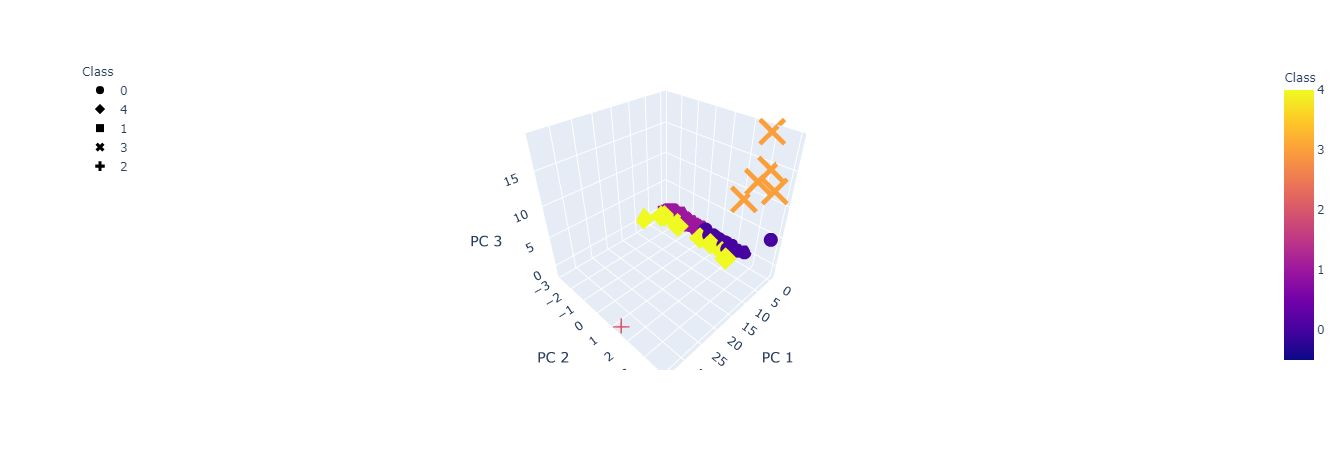

In [44]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x = 'PC 1',
    y = 'PC 2',
    z = 'PC 3',
    color = 'Class',
    symbol = 'Class',
    width = 800,
    hover_name = 'CoinName',
    hover_data = ['Algorithm']
)
fig.update_layout(legend = dict(x = 0, y = 1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [45]:
# Table with tradable cryptos
crypto_table = clustered_df.hvplot.table(
    columns = ["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"],
    sortable = True,
    selectable = True
)
crypto_table

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [46]:
# Print the total number of tradable cryptocurrencies
print(f"# of Tradable Cryptocurrencies: {len(pd.unique(clustered_df['CoinName']))}")

# of Tradable Cryptocurrencies: 531


#### Scatter Plot with Tradable Cryptocurrencies

In [47]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
clustered_df.hvplot.scatter(
    x = 'TotalCoinsMined',
    y = 'TotalCoinSupply',
    hover_cols = ['CoinName'],
    by = 'Class'
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)